# Washburn Equation

In [17]:
from codey_functions import *

## Exploration of Micro Dataset

In [18]:
micro_df = pd.read_csv('datasets/microscopy-data.csv')
micro_df.head()

,gamma,phi,eta,L,t,r
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07


In [19]:
micro_df.describe()

,gamma,phi,eta,L,t,r
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,0.073197,1.448925,0.001000,0.006070,19.757165,5.344857e-07
std,0.009956,0.095581,0.000010,0.003180,5.803528,2.163520e-07
min,0.043428,1.072712,0.000971,0.000483,10.013910,1.562959e-07
25%,0.066741,1.404303,0.000993,0.003843,14.844579,3.278206e-07
50%,0.073391,1.471977,0.001001,0.005550,19.846801,4.938002e-07
75%,0.079266,1.520274,0.001007,0.007904,24.767974,7.572568e-07
max,0.103439,1.570269,0.001034,0.019009,29.934807,8.991764e-07


In [20]:
def scatter_plot_3D(x, y, z, x_label, y_label, z_label, eye_x, eye_y, eye_z):
    fig = go.Figure(data=[go.Scatter3d(
        x = x,
        y = y,
        z = z,
        mode='markers',
        marker=dict(
            size=5,
            color=z,
            colorscale='Viridis',   
            opacity=0.8
        )
    )])

    fig.update_layout(
        scene=dict(
            xaxis=dict(title=x_label, title_font=dict(size=20)),
            yaxis=dict(title=y_label, title_font=dict(size=20)),
            zaxis=dict(title=z_label, title_font=dict(size=20)),
        ),
        margin=dict(l=0, r=0, b=0, t=0),
        height=500,
        width=500,
        template='plotly_white',
        font=dict(family="Helvetica",
                size=14,
                color="black",),
        
        scene_camera = dict(
        up=dict(x=0, y=0, z=1),
        center=dict(x=0, y=0, z=0),
        eye=dict(x=eye_x, y=eye_y, z=eye_z))
        )

    fig.show()

In [21]:
scatter_plot_3D(micro_df['L'], micro_df['t'], micro_df['phi'], 
                'L / m', 'Time / s', 'Φ / rad', 2, 2, 1.5)

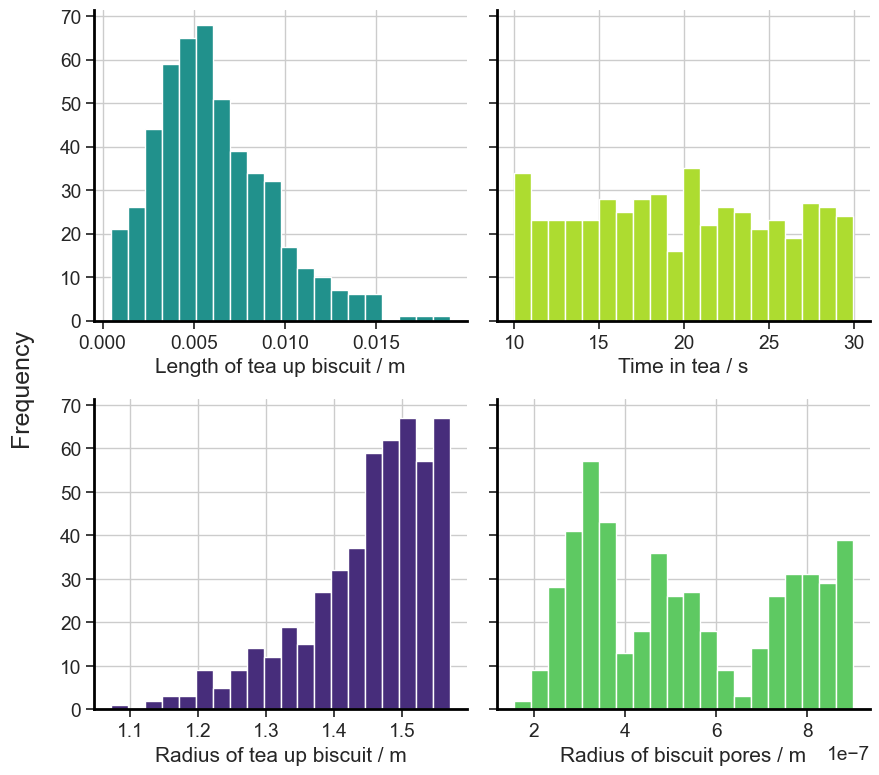

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(9, 8), sharey=True)

axs[0,0].hist(micro_df['L'], bins=20, color=palette[0])
axs[0,0].set_xlabel('Length of tea up biscuit / m')

axs[0,1].hist(micro_df['t'], bins=20, color=palette[1])
axs[0,1].set_xlabel('Time in tea / s')

axs[1,0].hist(micro_df['phi'], bins=20, color=palette[2])
axs[1,0].set_xlabel('Radius of tea up biscuit / m')

axs[1,1].hist(micro_df['r'], bins=20, color=palette[3])
axs[1,1].set_xlabel('Radius of biscuit pores / m')

fig.supylabel('Frequency')
plt.tight_layout()
plt.show()

## Models

In [23]:
washburn_model = biscuit_models(micro_df, washburn_eqn=True)
washburn_model.df.head()

,gamma,phi,eta,L,t,r,L_squared,cos(phi),2eta,1/gamma,1/t,1/cos(phi),washburn_eqn
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07,1.037194e-05,0.013429,0.001963,11.820941,0.041269,74.466315,7.396247e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07,5.736307e-06,0.031949,0.001995,15.554221,0.045106,31.300200,2.513107e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07,9.220038e-06,0.024656,0.002015,11.597758,0.042996,40.558426,3.757911e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07,1.589337e-06,0.003918,0.001995,12.068685,0.078632,255.213816,7.678998e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07,3.318623e-07,0.000567,0.002003,11.009282,0.065836,1762.819840,8.494983e-07


In [24]:
scatter_plot_3D(washburn_model.df['L_squared'], washburn_model.df['t'], washburn_model.df['cos(phi)'],
                'L<sup>2</sup> / m<sup>2</sup>', 'Time / s', 'cos(Φ)', -1.75, -1.75, 1.5)

## Washburn as feature within Linear Regression

Mean Squared Error: 1.543e-16
Mean Absolute Error: 9.361e-09
Root Mean Squared Error: 1.242e-08
$R^2$: 0.997


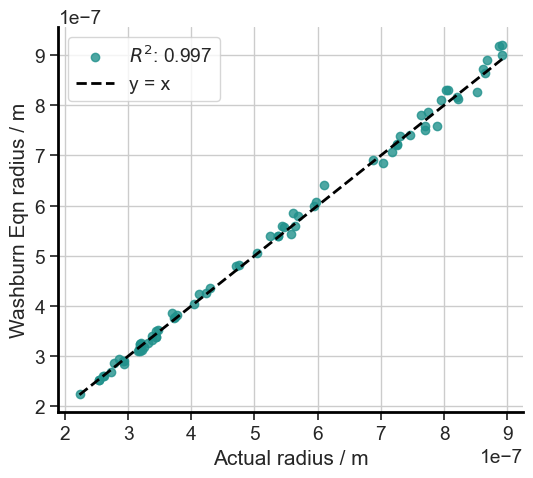

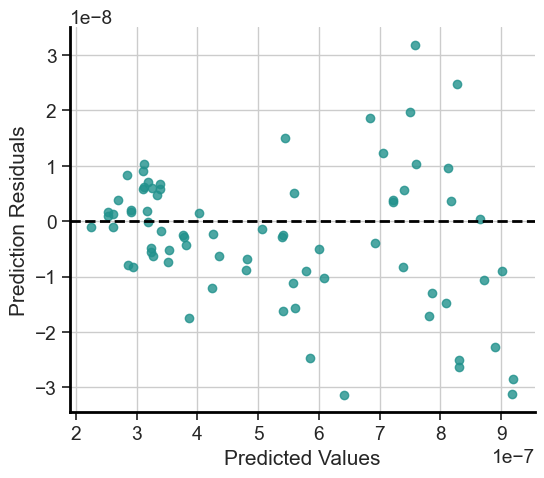

In [25]:
washburn_model.define_features(feature_columns=['washburn_eqn'], target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='linear_regression', fit_intercept = False)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Washburn Eqn radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()

## Other values within linear regression

In [26]:
features_within_eqn = ['L_squared', '1/t', '1/cos(phi)', '1/gamma', '2eta']
all_features = ['gamma', 'phi', 'eta', 'L', 't','L_squared', 'cos(phi)', '2eta','1/gamma', '1/t', '1/cos(phi)']

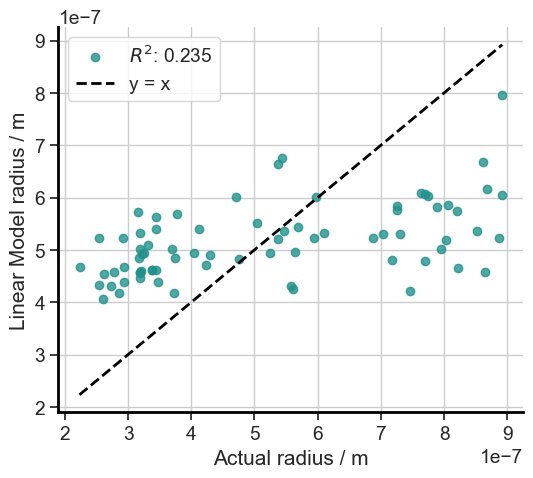

Mean Squared Error: 3.445e-14
Mean Absolute Error: 1.642e-07
Root Mean Squared Error: 1.856e-07
$R^2$: 0.235


In [27]:
washburn_model.define_features(feature_columns=features_within_eqn, target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='linear_regression', fit_intercept = False)
washburn_model.evaluate_model()
washburn_model.plot_predictions(ylabel='Linear Model radius / m', xlabel='Actual radius / m')
washburn_model.print_metrics()

1 Features: ['L']
2 Features: ['L', 'L_squared']
3 Features: ['L', 'L_squared', '2eta']
4 Features: ['eta', 'L', 'L_squared', '2eta']
5 Features: ['gamma', 'eta', 'L', 'L_squared', '2eta']
6 Features: ['gamma', 'phi', 'eta', 'L', 'L_squared', '2eta']
7 Features: ['gamma', 'phi', 'eta', 'L', 'L_squared', 'cos(phi)', '2eta']
8 Features: ['gamma', 'phi', 'eta', 'L', 'L_squared', 'cos(phi)', '2eta', '1/gamma']
9 Features: ['gamma', 'phi', 'eta', 'L', 'L_squared', 'cos(phi)', '2eta', '1/gamma', '1/cos(phi)']
10 Features: ['gamma', 'phi', 'eta', 'L', 't', 'L_squared', 'cos(phi)', '2eta', '1/gamma', '1/cos(phi)']
11 Features: ['gamma', 'phi', 'eta', 'L', 't', 'L_squared', 'cos(phi)', '2eta', '1/gamma', '1/t', '1/cos(phi)']


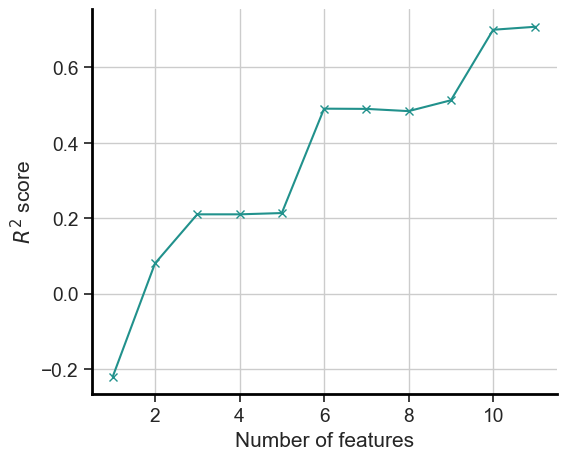

In [28]:
from sklearn.feature_selection import SelectKBest, f_regression

regression_scores = []
features_df = washburn_model.df[all_features]

for i in range(1, len(features_df.columns)+1):
    selector = SelectKBest(f_regression, k=i)
    selector.fit(features_df, washburn_model.df['r'])
    # Get columns to keep and create new dataframe with those only
    cols_idxs = selector.get_support(indices=True)
    selectKbest_features = features_df.iloc[:,cols_idxs].columns.to_list()

    washburn_model.define_features(feature_columns=selectKbest_features, target_column='r')
    washburn_model.train_test_split_data(test_size=0.15, random_state=42)
    washburn_model.train_model(model_type='linear_regression', fit_intercept = False)
    washburn_model.evaluate_model()
    regression_scores.append(washburn_model.r2)
    
    print(f'{i} Features: {selectKbest_features}')

plt.figure(figsize=(6, 5))
plt.plot(range(1, len(features_df.columns)+1), regression_scores, marker='x')
plt.xlabel('Number of features')
plt.ylabel(f'$R^{2}$ score')
plt.show()

The best model here has all features included, this might overfit the model?

Mean Squared Error: 1.317e-14
Mean Absolute Error: 8.922e-08
Root Mean Squared Error: 1.147e-07
$R^2$: 0.708


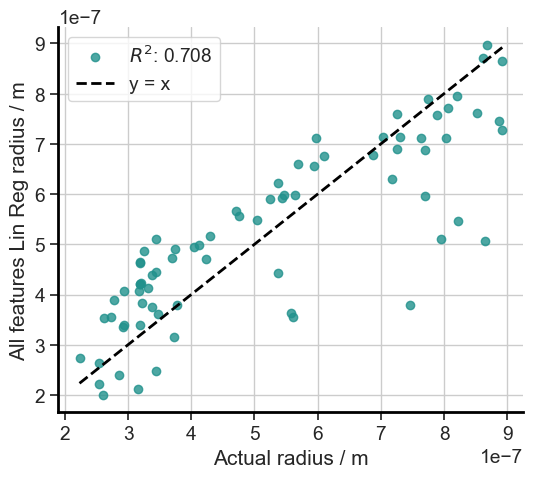

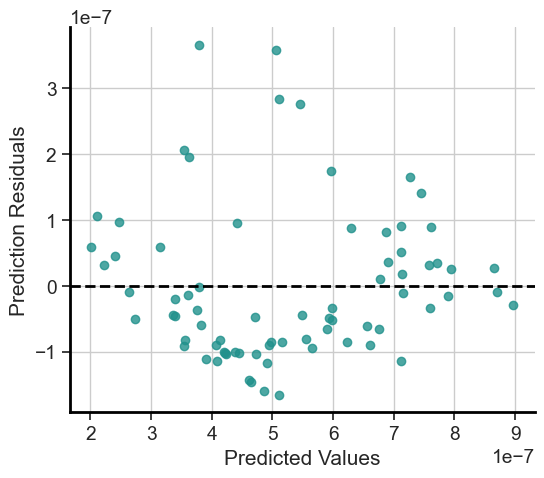

In [29]:
washburn_model.define_features(feature_columns=all_features, target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='linear_regression', fit_intercept = False)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='All features Lin Reg radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()

Okay so I would say that this is not overfitted but also this is a polynomial residual! we need to include this into the model.

Lets test this with only values already within the equation, we don't include L^2 here as the polynomial transformation should help with that

Mean Squared Error: 1.648e-15
Mean Absolute Error: 2.326e-08
Root Mean Squared Error: 4.060e-08
$R^2$: 0.963


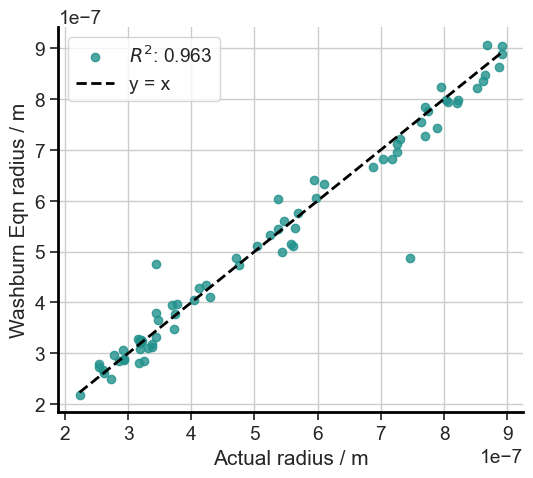

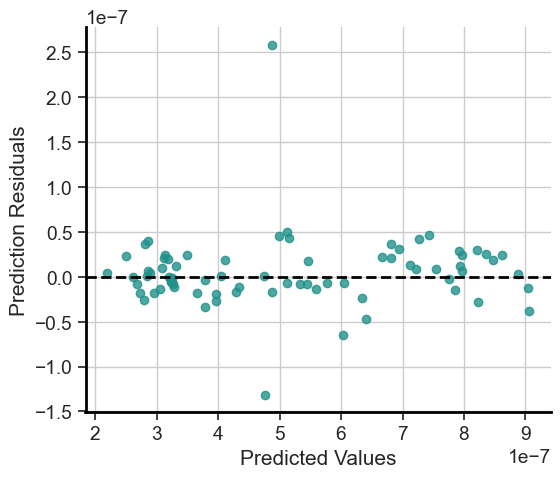

In [30]:
washburn_model.define_features(feature_columns=['L', '1/t', '1/cos(phi)', '2eta', '1/gamma'], target_column='r')
washburn_model.polynommial_features(degree=3)
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='linear_regression', fit_intercept = False)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Washburn Eqn radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()

This model does have some really clear outliers

## Random Forest Regression

Mean Squared Error: 1.209e-14
Mean Absolute Error: 8.415e-08
Root Mean Squared Error: 1.099e-07
$R^2$: 0.732


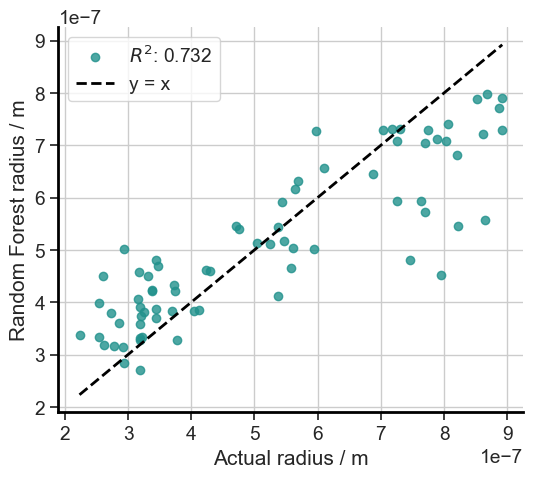

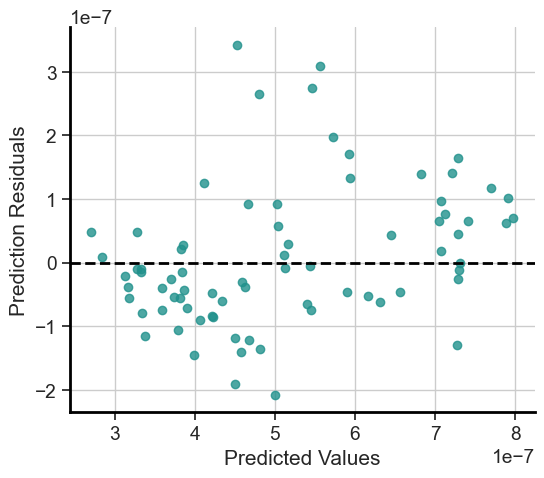

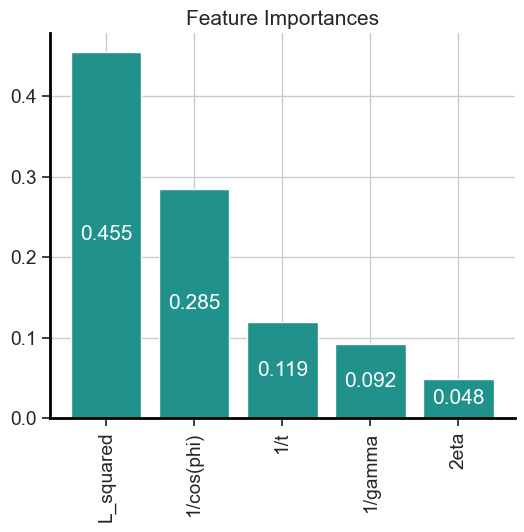

In [31]:
washburn_model.define_features(feature_columns=features_within_eqn, target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='random_forest_regression')
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Random Forest radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()
washburn_model.plot_feature_importances()

With Polynomials

Mean Squared Error: 5.556e-16
Mean Absolute Error: 1.769e-08
Root Mean Squared Error: 2.357e-08
$R^2$: 0.988


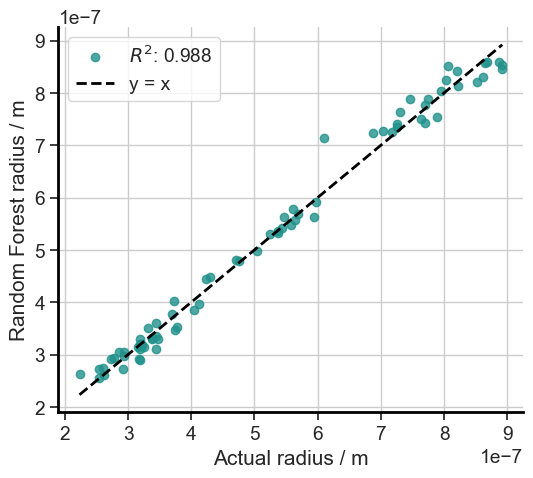

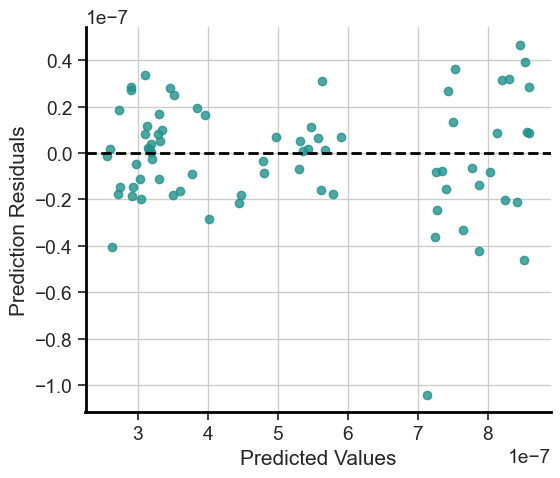

In [32]:
washburn_model.define_features(feature_columns=features_within_eqn, target_column='r')
washburn_model.polynommial_features(degree=3)
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='random_forest_regression', random_state=42, n_estimators=100)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Random Forest radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()

# Concluding Statement

The washburn equation does the best out of all the model I have made, the polynomial transformation does help the regression understand the equation better but you know..